<h1> Generalization </h1>

In [1]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json

path_generalization = "generalization_v{}/"
base_path_results = "./out/"
max_experiments = 10

generalization_versions = [1, 2, 3]
tests = ["generalization_m_3_r_2_to_m_4_r_2", 
        "generalization_m_3_r_2_to_m_4_r_3", 
        "generalization_m_4_r_2_to_m_4_r_3",
        "generalization_m_4_r_3_to_m_5_r_3",
        "generalization_m_5_r_3_to_m_5_r_4"]
info = ["data", "conf"]
test_type = ["constraints", "dimensions", "dimensions", "constraints", "dimensions"]

baseline_tests = ["normalization_m_3_r_2", "normalization_m_4_r_2", "normalization_m_4_r_3", "normalization_m_5_r_3", "normalization_m_5_r_4"]


data_array = {}

for version in generalization_versions:
    v_generalization = path_generalization.format(version)
    for test in tests:
        data_path = base_path_results + v_generalization + test + "/data/out_1.csv"
        config_path = base_path_results + v_generalization + test + "/config/conf_1.json"
        
        data_file = pd.read_csv(data_path)
        with open(config_path) as f:
            conf_file = json.load(f)
    
        data_array[(version, test, "data")] = data_file
        data_array[(version, test, "conf")] = conf_file


for b_test in baseline_tests:
    data_path = base_path_results + b_test + "/data/out_1.csv"
    config_path = base_path_results + b_test + "/config/conf_1.json"
    
    data_file = pd.read_csv(data_path)
    with open(config_path) as f:
        conf_file = json.load(f)

    data_array[(0, b_test, "data")] = data_file
    data_array[(0, b_test, "conf")] = conf_file

In [2]:
#Best values for each run

data_best_results = pd.DataFrame(columns=["version", "test", "type", "set", "targhet_patition", "mse", "mae", "mre"])

for version in generalization_versions:
    for idx_test, test in enumerate(tests):
        for set in ["train", "dev", "test"]:
            
            index_lowest = data_array[(version, test, "data")]["mae_dev"].idxmin()
            
            mse = data_array[(version, test, "data")].iloc[index_lowest][f"mse_{set}"]
            mae = data_array[(version, test, "data")].iloc[index_lowest][f"mae_{set}"]
            mre = data_array[(version, test, "data")].iloc[index_lowest][f"mre_{set}"]
            
            new_data = pd.DataFrame({
                "version": ["v_{}".format(version)],
                "test": [test],
                "type": ["generalization"],
                "gen_type": [test_type[idx_test]],
                "targhet_patition": [data_array[(version, test, "conf")]["data"]["data"][1]],
                "set": [set],
                "mse": [mse],
                "mae": [mae],
                "mre": [mre]
            })
            
            data_best_results = pd.concat([data_best_results, new_data], ignore_index=True)
            
            

for b_test in baseline_tests:
    for set in ["train", "dev", "test"]:
        
        index_lowest = data_array[(0, b_test, "data")]["mae_dev"].idxmin()
        
        mse = data_array[(0, b_test, "data")].iloc[index_lowest][f"mse_{set}"]
        mae = data_array[(0, b_test, "data")].iloc[index_lowest][f"mae_{set}"]
        mre = data_array[(0, b_test, "data")].iloc[index_lowest][f"mre_{set}"]
        
        new_data = pd.DataFrame({
            "version": ["baseline"],
            "test": [b_test],
            "type": ["baseline"],
            "gen_type": ["baseline"],
            "targhet_patition": [data_array[(0, b_test, "conf")]["data"]["data"][0]],
            "set": [set],
            "mse": [mse],
            "mae": [mae],
            "mre": [mre]
        })
        
        data_best_results = pd.concat([data_best_results, new_data], ignore_index=True)


# Save the best results to a CSV file
data_best_results.to_csv("best_results.csv", index=False)

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_10236/2701556262.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_best_results = pd.concat([data_best_results, new_data], ignore_index=True)


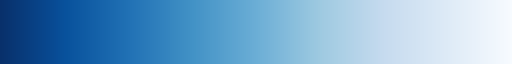

In [27]:
sns.color_palette("crest", as_cmap=True)
sns.color_palette("Blues", as_cmap=True)
sns.color_palette("Blues_r", as_cmap=True)

In [3]:
#Inutle

"""

sns.set_theme(style="whitegrid")
figure_1, ax_1 = plt.subplots(2, figsize=(5, 10))

data_best_results_test = data_best_results[data_best_results["set"] == "test"]
data_best_results_test_remove_useless = data_best_results_test[data_best_results_test["targhet_patition"] != "m_3_r_2"]


sns.lineplot(data=data_best_results_test_remove_useless, x="targhet_patition", y="mae", hue="type", ax=ax_1[0])
sns.lineplot(data=data_best_results_test_remove_useless, x="targhet_patition", y="mre", hue="type", ax=ax_1[1])
"""

'\n\nsns.set_theme(style="whitegrid")\nfigure_1, ax_1 = plt.subplots(2, figsize=(5, 10))\n\ndata_best_results_test = data_best_results[data_best_results["set"] == "test"]\ndata_best_results_test_remove_useless = data_best_results_test[data_best_results_test["targhet_patition"] != "m_3_r_2"]\n\n\nsns.lineplot(data=data_best_results_test_remove_useless, x="targhet_patition", y="mae", hue="type", ax=ax_1[0])\nsns.lineplot(data=data_best_results_test_remove_useless, x="targhet_patition", y="mre", hue="type", ax=ax_1[1])\n'

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_10236/3799151748.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_best_results_test_remove_useless, x="gen_type", y="mae", ax=ax_2[0], palette="Blues_r")
/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_10236/3799151748.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_best_results_test_remove_useless, x="gen_type", y="mre", ax=ax_2[1], palette="Blues_r")


<Axes: xlabel='gen_type', ylabel='mre'>

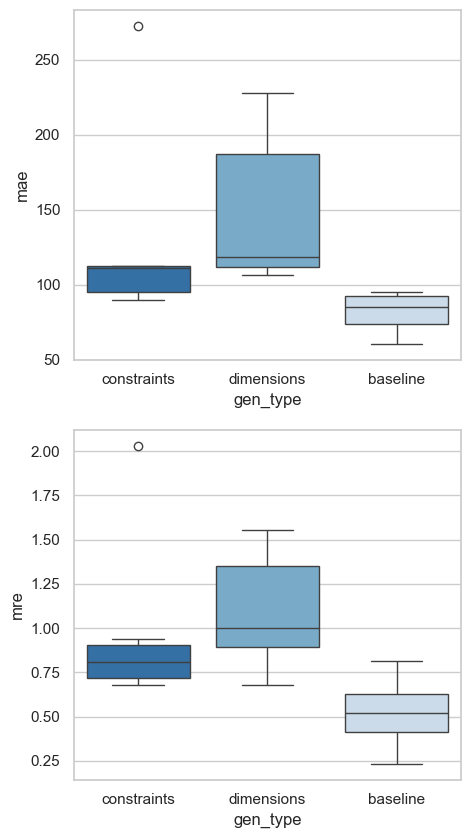

In [ ]:
sns.set_theme(style="whitegrid")
figure_2, ax_2 = plt.subplots(2, figsize=(5, 10))

data_best_results_test = data_best_results[data_best_results["set"] == "test"]
data_best_results_test_remove_useless = data_best_results_test[data_best_results_test["targhet_patition"] != "m_3_r_2"]

sns.boxplot(data=data_best_results_test_remove_useless, x="gen_type", y="mae", ax=ax_2[0], palette="Blues_r")


sns.boxplot(data=data_best_results_test_remove_useless, x="gen_type", y="mre", ax=ax_2[1], palette="Blues_r")

<Axes: xlabel='targhet_patition', ylabel='mre'>

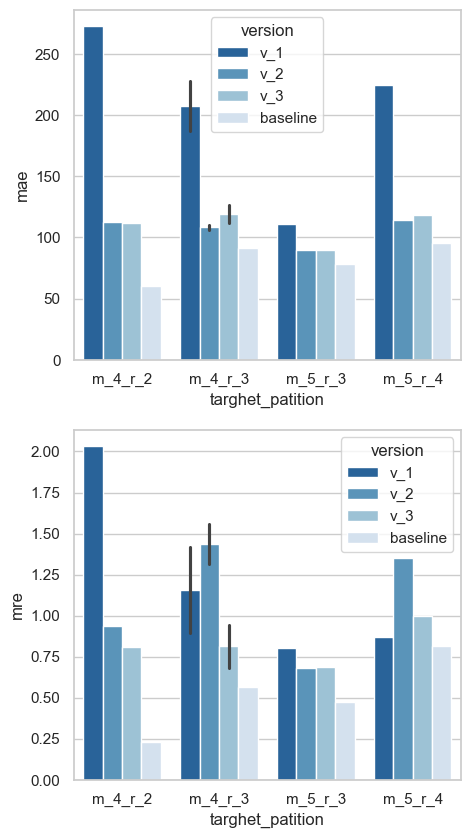

In [29]:
sns.set_theme(style="whitegrid")
figure_3, ax_3 = plt.subplots(2, figsize=(5, 10))

data_best_results_test = data_best_results[data_best_results["set"] == "test"]
data_best_results_test_remove_useless = data_best_results_test[data_best_results_test["targhet_patition"] != "m_3_r_2"]

sns.barplot(data=data_best_results_test_remove_useless, x="targhet_patition", y="mae", hue="version", ax=ax_3[0], palette="Blues_r")
sns.barplot(data=data_best_results_test_remove_useless, x="targhet_patition", y="mre", hue="version", ax=ax_3[1], palette="Blues_r")


In [6]:
"""#Demo plots


sns.set_theme(style="whitegrid")
figure_demo, ax_demo = plt.subplots(3, 2, figsize=(15, 15))






#sns.boxplot(data=data_best_results_test, x="gen_type", y="mre", ax=ax_demo[0, 0])
sns.boxplot(data=data_best_results_test, x="gen_type", y="mae", ax=ax_demo[0, 0])


sns.barplot(data=data_best_results_test, x="targhet_patition", y="mre", hue="version", ax=ax_demo[1, 0])



sns.lineplot(data=data_best_results_test, x="targhet_patition", y="mae", hue="type", ax=ax_demo[0, 1])
sns.boxplot(data=data_best_results_test, x="targhet_patition", y="mre", hue="type", ax=ax_demo[1, 1])




data_best_results_test_v1 = data_best_results_test[(data_best_results_test["version"] == 0) | (data_best_results_test["version"] == 1)]
sns.lineplot(data=data_best_results_test_v1, x="targhet_patition", y="mre", hue="type", ax=ax_demo[2, 0])
"""

'#Demo plots\n\n\nsns.set_theme(style="whitegrid")\nfigure_demo, ax_demo = plt.subplots(3, 2, figsize=(15, 15))\n\n\n\n\n\n\n#sns.boxplot(data=data_best_results_test, x="gen_type", y="mre", ax=ax_demo[0, 0])\nsns.boxplot(data=data_best_results_test, x="gen_type", y="mae", ax=ax_demo[0, 0])\n\n\nsns.barplot(data=data_best_results_test, x="targhet_patition", y="mre", hue="version", ax=ax_demo[1, 0])\n\n\n\nsns.lineplot(data=data_best_results_test, x="targhet_patition", y="mae", hue="type", ax=ax_demo[0, 1])\nsns.boxplot(data=data_best_results_test, x="targhet_patition", y="mre", hue="type", ax=ax_demo[1, 1])\n\n\n\n\ndata_best_results_test_v1 = data_best_results_test[(data_best_results_test["version"] == 0) | (data_best_results_test["version"] == 1)]\nsns.lineplot(data=data_best_results_test_v1, x="targhet_patition", y="mre", hue="type", ax=ax_demo[2, 0])\n'

<h1> All data </h1>

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json

path_generalization = "generalization_v{}/"
base_path_results = "./out/"
max_experiments = 10

info = ["data", "conf"]
test_type = ["constraints", "dimensions", "dimensions", "constraints", "dimensions"]

baseline_tests = ["normalization_m_3_r_2", "normalization_m_4_r_2", "normalization_m_4_r_3", "normalization_m_5_r_3", "normalization_m_5_r_4"]

data_array = {}




data_path = base_path_results + "all_data"  + "/data/out_1.csv"
config_path = base_path_results + "all_data" + "/config/conf_1.json"

data_file = pd.read_csv(data_path)
with open(config_path) as f:
    conf_file = json.load(f)
    
data_array[("all_data", "data")] = data_file
data_array[("all_data", "conf")] = conf_file



for b_test in baseline_tests:
    data_path = base_path_results + b_test + "/data/out_1.csv"
    config_path = base_path_results + b_test + "/config/conf_1.json"
    
    data_file = pd.read_csv(data_path)
    with open(config_path) as f:
        conf_file = json.load(f)

    data_array[(b_test, "data")] = data_file
    data_array[(b_test, "conf")] = conf_file

In [8]:
#Best values for each run

data_all_results = pd.DataFrame(columns=["test", "type", "set", "targhet_patition", "mse", "mae", "mre"])

all_tests = ["all_data"] + baseline_tests
for b_test in all_tests:
    for set in ["train", "dev", "test"]:
        
        index_lowest = data_array[(b_test, "data")]["mae_dev"].idxmin()
        
        mse = data_array[(b_test, "data")].iloc[index_lowest][f"mse_{set}"]
        mae = data_array[(b_test, "data")].iloc[index_lowest][f"mae_{set}"]
        mre = data_array[(b_test, "data")].iloc[index_lowest][f"mre_{set}"]
        
        version = "baseline" if b_test in baseline_tests else "all_data"
        
        if b_test == "all_data":
            taghet_partiotion = "all_data"
        else:
            taghet_partiotion = data_array[(b_test, "conf")]["data"]["data"][0]
            
        
        new_data = pd.DataFrame({
            "test": [b_test],
            "type": [version],
            "targhet_patition": taghet_partiotion,
            "set": [set],
            "mse": [mse],
            "mae": [mae],
            "mre": [mre]
        })
        
        data_all_results = pd.concat([data_all_results, new_data], ignore_index=True)

# Save the best results to a CSV file
data_all_results.to_csv("all_results.csv", index=False)

/var/folders/k2/frn908kd4_q13s9qm8hj9zcw0000gn/T/ipykernel_10236/1484096246.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_all_results = pd.concat([data_all_results, new_data], ignore_index=True)


Mean MAE (excluding all_data): 75.8391235241294
Mean MRE (excluding all_data): 0.4723597259121067


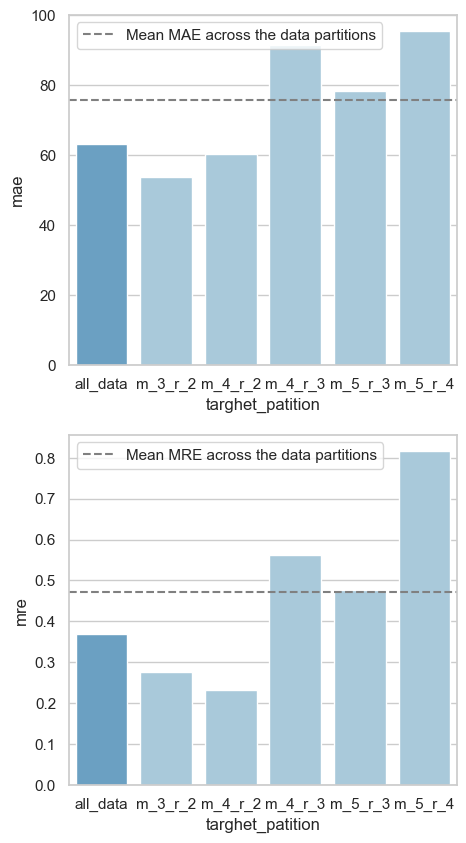

In [39]:
sns.set_theme(style="whitegrid")
figure_1, ax_1 = plt.subplots(2, figsize=(5, 10))

data_all_results_test = data_all_results[data_all_results["set"] == "test"]


mean_mae = data_all_results_test[data_all_results_test["targhet_patition"] != "all_data"]["mae"].mean()
print(f"Mean MAE (excluding all_data): {mean_mae}")

mean_mre = data_all_results_test[data_all_results_test["targhet_patition"] != "all_data"]["mre"].mean()
print(f"Mean MRE (excluding all_data): {mean_mre}")

dark_color = sns.color_palette("Blues_r", n_colors=10)[4]
light_color = sns.color_palette("Blues_r", n_colors=10)[6]

sns.barplot(data=data_all_results_test[data_all_results_test["targhet_patition"] == "all_data"], x="targhet_patition", y="mae", ax=ax_1[0], color=dark_color)
sns.barplot(data=data_all_results_test[data_all_results_test["targhet_patition"] != "all_data"], x="targhet_patition", y="mae", ax=ax_1[0], color=light_color)
ax_1[0].axhline(mean_mae, color='grey', linestyle='--', label='Mean MAE across the data partitions')
ax_1[0].legend()




sns.barplot(data=data_all_results_test[data_all_results_test["targhet_patition"] == "all_data"], x="targhet_patition", y="mre", ax=ax_1[1], color=dark_color)
sns.barplot(data=data_all_results_test[data_all_results_test["targhet_patition"] != "all_data"], x="targhet_patition", y="mre", ax=ax_1[1], color=light_color)
ax_1[1].axhline(mean_mre, color='grey', linestyle='--', label='Mean MRE across the data partitions')
ax_1[1].legend()

In [10]:
"""#Demo plots


sns.set_theme(style="whitegrid")
figure_demo, ax_demo = plt.subplots(3, 2, figsize=(15, 15))


data_all_results_test = data_all_results[data_all_results["set"] == "test"]



#sns.boxplot(data=data_best_results_test, x="gen_type", y="mre", ax=ax_demo[0, 0])
#sns.boxplot(data=data_all_results_test, x="gen_type", y="mae", ax=ax_demo[0, 0])


sns.barplot(data=data_all_results_test, x="targhet_patition", y="mre", ax=ax_demo[1, 0])



sns.lineplot(data=data_all_results_test, x="targhet_patition", y="mae", hue="type", ax=ax_demo[0, 1])
sns.boxplot(data=data_all_results_test, x="targhet_patition", y="mre", hue="type", ax=ax_demo[1, 1])


"""

'#Demo plots\n\n\nsns.set_theme(style="whitegrid")\nfigure_demo, ax_demo = plt.subplots(3, 2, figsize=(15, 15))\n\n\ndata_all_results_test = data_all_results[data_all_results["set"] == "test"]\n\n\n\n#sns.boxplot(data=data_best_results_test, x="gen_type", y="mre", ax=ax_demo[0, 0])\n#sns.boxplot(data=data_all_results_test, x="gen_type", y="mae", ax=ax_demo[0, 0])\n\n\nsns.barplot(data=data_all_results_test, x="targhet_patition", y="mre", ax=ax_demo[1, 0])\n\n\n\nsns.lineplot(data=data_all_results_test, x="targhet_patition", y="mae", hue="type", ax=ax_demo[0, 1])\nsns.boxplot(data=data_all_results_test, x="targhet_patition", y="mre", hue="type", ax=ax_demo[1, 1])\n\n\n'